In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the data
df=pd.read_csv('Nepali_Treking_EnhancedV2.csv')

In [3]:
df.head()

,Unnamed: 0,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Best Travel Time,Date of Travel,Sex,...,Regional code,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction
0,0,Everest Base Camp Trek,"\n$1,420 USD",16 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,9/13/2022,Non-Binary,...,0,total,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5
1,1,Everest Base Camp Short Trek,"\n$1,295 USD",14 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,9/4/2021,Female,...,40,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Everest Base Camp Heli Shuttle Trek,\n$2000 USD,12 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/25/2021,Female,...,80,Albania,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0
3,3,Everest Base Camp Heli Trek,"\n$3,300 USD",11 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,1/28/2022,Non-Binary,...,120,Algeria,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0
4,4,Everest Base Camp Trek for Seniors,"\n$1,800 USD",20 Days,Moderate,5545 m,Hotel/Guesthouse,March - May & Sept - Dec,10/21/2021,Non-Binary,...,200,Andra,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5


In [4]:
df.columns

Index(['Unnamed: 0', 'Trek', 'Cost', 'Time', 'Trip Grade', 'Max Altitude',
       'Accomodation', 'Best Travel Time', 'Date of Travel', 'Sex', 'Age',
       'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FrequentFlyer',
       'Year', 'Regional code', 'Country', 'Fitness Level',
       'Weather Conditions', 'Trekking Group Size', 'Guide/No Guide',
       'Equipment Used', 'Purpose of Travel', 'Health Incidents',
       'Review/Satisfaction'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           383 non-null    int64  
 1   Trek                 383 non-null    object 
 2   Cost                 383 non-null    object 
 3   Time                 383 non-null    object 
 4   Trip Grade           383 non-null    object 
 5   Max Altitude         383 non-null    object 
 6   Accomodation         383 non-null    object 
 7   Best Travel Time     383 non-null    object 
 8   Date of Travel       383 non-null    object 
 9   Sex                  383 non-null    object 
 10  Age                  383 non-null    int64  
 11  Employment Type      383 non-null    object 
 12  GraduateOrNot        383 non-null    object 
 13  AnnualIncome         383 non-null    int64  
 14  FrequentFlyer        383 non-null    object 
 15  Year                 383 non-null    int

In [93]:
df.describe() #summary statistics

In [94]:
#dropping the columns with missing values
df.drop("Unnamed: 0", inplace=True, axis=1) 
df.columns

In [6]:
# Dropping the unnecessary columns from the dataset
df.drop(["AnnualIncome", "Employment Type", "GraduateOrNot"], inplace=True, axis=1)
df.columns

In [8]:
#removing the string 'USD' from the 'Cost' column
df['Cost'] = df['Cost'].replace(r'[\$, USD]', '', regex=True).astype(float)

In [9]:
#removing the string 'Days' from the 'Time' column
df['Time'] = df['Time'].astype(str).str.strip().str.replace(r'(?i)\s*Days?', '', regex=True).astype(int)

In [10]:
# Remove the 'm' and any commas from the 'Max Altitude' column
df['Max Altitude'] = df['Max Altitude'].str.replace(r'(?i)\s*m', '', regex=True).str.replace(',', '')

# Convert the column to an integer type
df['Max Altitude'] = df['Max Altitude'].astype(int)

In [12]:
df.head()

,Trek,Time,Max Altitude,Trip Grade,Cost,Age,Trekking Group Size,Fitness Level
0,Everest Base Camp Trek,16,5545,Moderate,1420.0,31,10.0,Intermediate
1,Everest Base Camp Short Trek,14,5545,Moderate,1295.0,31,NaN,NaN
2,Everest Base Camp Heli Shuttle Trek,12,5545,Moderate,2000.0,34,12.0,Advanced
3,Everest Base Camp Heli Trek,11,5545,Moderate,3300.0,28,5.0,Intermediate
4,Everest Base Camp Trek for Seniors,20,5545,Moderate,1800.0,28,6.0,Beginner


In [11]:
# Clean the 'trek' column
df['Trek'] = df['Trek'].str.strip().str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Display the cleaned DataFrame
print(df['Trek'])

0                   Everest Base Camp Trek
1             Everest Base Camp Short Trek
2      Everest Base Camp Heli Shuttle Trek
3              Everest Base Camp Heli Trek
4       Everest Base Camp Trek for Seniors
                      ...                 
378               Ghorepani Poon Hill Trek
379                     Upper Mustang Trek
380                       Mardi Himal Trek
381               Langtang Valley Trekking
382                   Manaslu Circuit Trek
Name: Trek, Length: 383, dtype: object


In [101]:
# Convert date columns to datetime
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], errors='coerce')

In [13]:
import re
def clean_best_travel_time(time: str) -> str:
    # Shortening months for consistency
    time = re.sub(r"\bSetpt\b", "Sep", time)
    time = re.sub(r"\bSept\b", "Sep", time)
    time = re.sub(r"\bJan\b", "Jan", time)
    time = re.sub(r"\bMarch\b", "Mar", time)
    time = re.sub(r"\bApril\b", "Apr", time)

    # Remove punctuations and add spaces
    time = re.sub(r"\.", "", time)
    time = re.sub(r"\s", "", time)
    time = re.sub(r"-", " - ", time)
    time = re.sub(r"\s*&\s*", " & ", time)

    return time

df['Best Travel Time'] = df['Best Travel Time'].apply(clean_best_travel_time)

df['Best Travel Time'].unique()

In [14]:
# Function to map month ranges to seasons
def get_season(time_range):
    seasons = set()
    if any(month in time_range for month in ['Mar', 'Apr', 'May']):
        seasons.add('Spring')
    if any(month in time_range for month in ['Jun', 'Jul', 'Aug']):
        seasons.add('Summer')
    if any(month in time_range for month in ['Sep', 'Oct', 'Nov']):
        seasons.add('Autumn')
    if any(month in time_range for month in ['Dec', 'Jan', 'Feb']):
        seasons.add('Winter')

    # Prioritize Autumn if both Autumn and Winter exist
    if 'Autumn' in seasons and 'Winter' in seasons:
        return ['Autumn', 'Winter']

    return list(seasons) if seasons else [None]


# Function to split "Best Travel Time" into two favorable seasons
def split_travel_time(time):
    if pd.isnull(time):
        return pd.Series([None, None])

    # Split if there are two ranges with '&'
    if '&' in time:
        seasons = time.split(' & ')
        season1 = get_season(seasons[0].strip())
        season2 = get_season(seasons[1].strip())
        return pd.Series([season1[0] if season1 else None, season2[0] if season2 else None])
    else:
        # If only one season range, return the same season for both columns
        season = get_season(time.strip())
        return pd.Series([season[0] if season else None, season[0] if season else None])


# Apply the function to split the 'Best Travel Time' column
df[['Best Travel Time 1', 'Best Travel Time 2']] = df['Best Travel Time'].apply(split_travel_time)

# Drop the original "Best Travel Time" column to avoid duplication
df.drop(columns=['Best Travel Time'], inplace=True)

# Re-arranging columns to place 'Best Travel Time 1' and 'Best Travel Time 2' before 'Date of Travel'
cols = df.columns.tolist()
# Remove 'Best Travel Time 1' and 'Best Travel Time 2' from the list if they already exist
if 'Best Travel Time 1' in cols:
    cols.remove('Best Travel Time 1')
if 'Best Travel Time 2' in cols:
    cols.remove('Best Travel Time 2')

# Find the index of 'Date of Travel'
date_of_travel_index = cols.index('Date of Travel')
# Insert the new columns before 'Date of Travel'
new_order = cols[:date_of_travel_index] + ['Best Travel Time 1', 'Best Travel Time 2'] + cols[date_of_travel_index:]
df = df[new_order]

# Output: Verify the final DataFrame
print(df.head())

C:\Users\supre\AppData\Local\Temp\ipykernel_11808\1940038514.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trekking Group Size'].fillna(mode_value, inplace=True)


In [104]:
#now join the Best Travel Time 1 and Best Travel Time 2 columns in a single column using - separator
df['Best Travel Time'] = df['Best Travel Time 1'] + ' - ' + df['Best Travel Time 2']

In [15]:
# Drop the 'Best Travel Time 1' and 'Best Travel Time 2' columns
df.drop(columns=['Best Travel Time 1', 'Best Travel Time 2'], inplace=True)

C:\Users\supre\AppData\Local\Temp\ipykernel_11808\1925400370.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trekking Group Size'].fillna(mode_value, inplace=True)# Drop the 'Best Travel Time 1' and 'Best Travel Time 2' columns


KeyError: "['Best Travel Time 1', 'Best Travel Time 2'] not found in axis"

In [106]:
df.head()

,Trek,Cost,Time,Trip Grade,Max Altitude,Accomodation,Date of Travel,Sex,Age,FrequentFlyer,...,Country,Fitness Level,Weather Conditions,Trekking Group Size,Guide/No Guide,Equipment Used,Purpose of Travel,Health Incidents,Review/Satisfaction,Best Travel Time
0,Everest Base Camp Trek,1420.0,16,Moderate,5545,Hotel/Guesthouse,2022-09-13,Non-Binary,31,No,...,total,Intermediate,Clear,10.0,Guide,Poles,Leisure,NaN,4.5,Spring - Autumn
1,Everest Base Camp Short Trek,1295.0,14,Moderate,5545,Hotel/Guesthouse,2021-09-04,Female,31,No,...,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring - Autumn
2,Everest Base Camp Heli Shuttle Trek,2000.0,12,Moderate,5545,Hotel/Guesthouse,2021-01-25,Female,34,No,...,Albania,Advanced,Snowy,12.0,Guide,Oxygen,Charity,NaN,5.0,Spring - Autumn
3,Everest Base Camp Heli Trek,3300.0,11,Moderate,5545,Hotel/Guesthouse,2022-01-28,Non-Binary,28,No,...,Algeria,Intermediate,Clear,5.0,Guide,Poles,Leisure,NaN,4.0,Spring - Autumn
4,Everest Base Camp Trek for Seniors,1800.0,20,Moderate,5545,Hotel/Guesthouse,2021-10-21,Non-Binary,28,Yes,...,Andra,Beginner,Cloudy,6.0,No Guide,NaN,Adventure,Minor Injury,3.5,Spring - Autumn


In [107]:
#whitespaces haru hatayako
df['Sex'] = df['Sex'].str.strip().str.lower()

In [108]:
# Map 'male' and 'female' to their respective categories, and all other values to 'other'
df['Sex'] = df['Sex'].map({'male': 'Male', 'female': 'Female'}).fillna('Other')

In [109]:
print(df['Sex'].value_counts())

Sex
Other     181
Female    103
Male       99
Name: count, dtype: int64


In [110]:
#median rakhdeako nan value ma reviews ko lagi
overall_median = df['Review/Satisfaction'].median()
# Replace the remaining NaN values with the overall median
df['Review/Satisfaction'].fillna(overall_median, inplace=True)
# Check to ensure no NaN values remain in the 'Review/Satisfaction' column
df['Review/Satisfaction'].isna().sum(), df['Review/Satisfaction'].head()

C:\Users\supre\AppData\Local\Temp\ipykernel_3608\3428833629.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





(0,
 0    4.5
 1    4.0
 2    5.0
 3    4.0
 4    3.5
 Name: Review/Satisfaction, dtype: float64)

In [111]:
# Define the mapping dictionary for trip grades
trip_grade_mapping = {
    'Easy': 0,
    'Light': 1,
    'Easy To Moderate': 1,
    'Light+Moderate': 2,
    'Easy-Moderate': 2,
    'Moderate': 3,
    'Moderate-Hard': 4,
    'Moderate+Demanding': 4,
    'Demanding': 4,
    'Strenuous': 5,
    'Demanding+Challenging': 5
}
# Apply the mapping to the 'Trip Grade' column
df['Trip Grade Numeric'] = df['Trip Grade'].map(trip_grade_mapping)

# Check the result
print(df[['Trip Grade', 'Trip Grade Numeric']].head())

  Trip Grade  Trip Grade Numeric
0   Moderate                   3
1   Moderate                   3
2   Moderate                   3
3   Moderate                   3
4   Moderate                   3


In [112]:
# Fill NaN values with the mode of the 'Guide' column
mode_value = df['Guide/No Guide'].mode()[0]
df['Guide/No Guide'] = df['Guide/No Guide'].fillna(mode_value)

In [113]:
# Map 'guide' to 1 and 'no guide' to 0
df['Guide/No Guide'] = df['Guide/No Guide'].str.strip().str.lower().map({'guide': 1, 'no guide': 0})

In [114]:
print(df['Guide/No Guide'].value_counts()) #checking the conversion

Guide/No Guide
1    245
0    138
Name: count, dtype: int64


In [115]:
# Remove 'Hotel/' from the 'Accomodation' column
df['Accomodation'] = df['Accomodation'].str.replace(r'^Hotel/', '', regex=True)

In [116]:
# Display the updated DataFrame
print(df)

                                    Trek    Cost  Time     Trip Grade  \
0                 Everest Base Camp Trek  1420.0    16       Moderate   
1           Everest Base Camp Short Trek  1295.0    14       Moderate   
2    Everest Base Camp Heli Shuttle Trek  2000.0    12       Moderate   
3            Everest Base Camp Heli Trek  3300.0    11       Moderate   
4     Everest Base Camp Trek for Seniors  1800.0    20       Moderate   
..                                   ...     ...   ...            ...   
378             Ghorepani Poon Hill Trek   450.0    10           Easy   
379                   Upper Mustang Trek  2100.0    17  Moderate-Hard   
380                     Mardi Himal Trek   590.0     9  Easy-Moderate   
381             Langtang Valley Trekking   690.0    11       Moderate   
382                 Manaslu Circuit Trek  1190.0    17  Moderate-Hard   

     Max Altitude Accomodation Date of Travel     Sex  Age FrequentFlyer  ...  \
0            5545   Guesthouse     2022-09

In [117]:
# Check for outliers in the 'Cost' column
fig = px.box(df,
             y='Cost',
             title='Box plot for Trek Costs',
             hover_data=['Trek', 'Time']
            )
fig.show()

In [118]:
# remove the outliers form the cost columns
# Calculate Q1, Q3, and IQR for 'Cost'
Q1 = df['Cost'].quantile(0.25)
Q3 = df['Cost'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['Cost'] >= lower_bound) & (df['Cost'] <= upper_bound)]

print(f"Original DataFrame Shape: {df.shape}")
print(f"DataFrame Shape After Removing Outliers: {df_no_outliers.shape}")

del Q1, Q3, IQR, lower_bound, upper_bound

Original DataFrame Shape: (383, 23)
DataFrame Shape After Removing Outliers: (335, 23)


In [119]:
# show the boxplot after removing the outliers
fig = px.box(df_no_outliers,
             y='Cost',
             title='Box plot for Trek Costs (Outliers Removed)',
             hover_data=['Trek', 'Time']
            )
fig.show()

In [120]:
# Create a new column 'Health_Issue' where 1 indicates an incident and 0 indicates 'None'
df['Health_Issue'] = df['Health Incidents'].apply(lambda x: 0 if pd.isna(x) or x.strip().lower() == 'none' else 1)

# Display the relevant columns to verify
df[['Health Incidents', 'Health_Issue']].head()

,Health Incidents,Health_Issue
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,Minor Injury,1


In [121]:
# Example mapping dictionary for weather conditions
weather_mapping = {
    'clear': 0,
    'cloudy': 1,
    'rainy': 2,
    'snowy': 3,
}
# Calculate the mode of the 'Weather Conditions' column
weather_mode = df['Weather Conditions'].mode()[0]  # Get the most frequent weather condition

# Replace NaN values in 'Weather Conditions' with the mode
df['Weather Conditions'].fillna(weather_mode, inplace=True)

# Map the values in the 'Weather Conditions' column, ensuring lower case and stripping whitespace
df['Weather Conditions'] = df['Weather Conditions'].str.strip().str.lower().map(weather_mapping)

# Handle any NaN values that might arise from the mapping process (like 'Unknown')
df['Weather Conditions'].fillna(-1, inplace=True)  # Use -1 for unmapped values

C:\Users\supre\AppData\Local\Temp\ipykernel_3608\2072188650.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\supre\AppData\Local\Temp\ipykernel_3608\2072188650.py:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [122]:
print(df['Weather Conditions'].value_counts())

Weather Conditions
0    172
3     73
1     70
2     68
Name: count, dtype: int64


In [123]:
# Calculate the mode of the "Trekking Group size" column
mode_value = df['Trekking Group Size'].mode()[0]
# Fill the null values with the mode
df['Trekking Group Size'].fillna(mode_value, inplace=True)

C:\Users\supre\AppData\Local\Temp\ipykernel_3608\1940038514.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [124]:
# Convert the 'Trekking Group Size' column to integers
df['Trekking Group Size'] = df['Trekking Group Size'].astype(int)

In [125]:
# Display the updated DataFrame
print(df)

                                    Trek    Cost  Time     Trip Grade  \
0                 Everest Base Camp Trek  1420.0    16       Moderate   
1           Everest Base Camp Short Trek  1295.0    14       Moderate   
2    Everest Base Camp Heli Shuttle Trek  2000.0    12       Moderate   
3            Everest Base Camp Heli Trek  3300.0    11       Moderate   
4     Everest Base Camp Trek for Seniors  1800.0    20       Moderate   
..                                   ...     ...   ...            ...   
378             Ghorepani Poon Hill Trek   450.0    10           Easy   
379                   Upper Mustang Trek  2100.0    17  Moderate-Hard   
380                     Mardi Himal Trek   590.0     9  Easy-Moderate   
381             Langtang Valley Trekking   690.0    11       Moderate   
382                 Manaslu Circuit Trek  1190.0    17  Moderate-Hard   

     Max Altitude Accomodation Date of Travel     Sex  Age FrequentFlyer  ...  \
0            5545   Guesthouse     2022-09

In [126]:
# mapping the fitness level
fitness_mapping = {
    'Beginner': 0,
    'Intermediate': 1,
    'Advanced': 2
}
# Map the 'Fitness Level' column
df['Fitness Level'] = df['Fitness Level'].map(fitness_mapping)

In [127]:
#nan value in the 'Fitness Level' column should be filled with the mode
mode_value = df['Fitness Level'].mode()[0]
df['Fitness Level'].fillna(mode_value, inplace=True)

C:\Users\supre\AppData\Local\Temp\ipykernel_3608\1388618134.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [128]:
df['Fitness Level'].value_counts()

Fitness Level
0.0    176
1.0    134
2.0     73
Name: count, dtype: int64

In [129]:
# download the cleaned dataset
# df.to_csv('Nepali_Trekking_cleaned.csv', index=False)

Visualization and Analysis

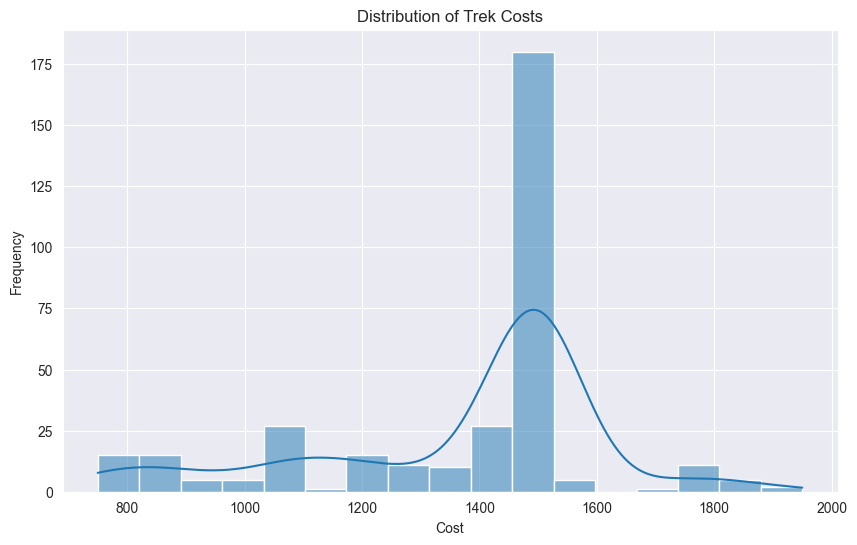

In [130]:
 # Plot the distribution of 'Cost'
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['Cost'], kde=True)
plt.title('Distribution of Trek Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

In [131]:
# visualization based on trek and best travel time
fig = px.histogram(df, x='Trek', color='Best Travel Time', title='Trek Count by Best Travel Time')
fig.show()

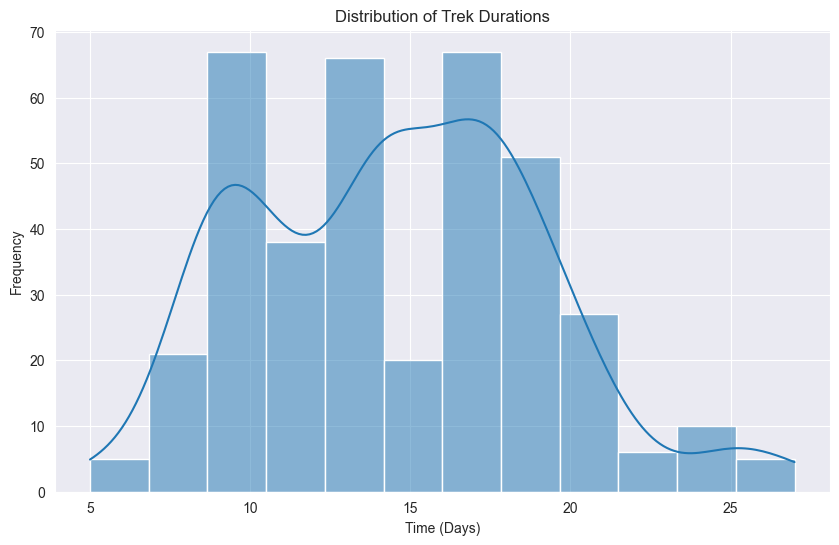

In [132]:
# Plot the distribution of 'Time' (Duration of Trek)
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], kde=True)
plt.title('Distribution of Trek Durations')
plt.xlabel('Time (Days)')
plt.ylabel('Frequency')
plt.show()

In [133]:
#plot the trek according to the ratings 
fig = px.scatter(df, x='Review/Satisfaction', y='Cost', color='Trek', title='Trek Ratings vs. Cost')
fig.show()

Cognitive Data Modelling

In [134]:
data=pd.read_csv('Nepali_Trekking_cleaned.csv')

In [135]:
# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [136]:
# Select the relevant columns for the model
# Convert categorical columns to numerical using LabelEncoder
# label_encoders = {}
# categorical_columns = ['Best Travel Time', 'Accomodation','Trek']
# 
# for column in categorical_columns:
#     label_encoders[column] = LabelEncoder()
#     df[column] = label_encoders[column].fit_transform(df[column])

# List of categorical columns that need to be encoded
# categorical_columns = ['Best Travel Time', 'Accomodation','Trek']  # Add more if necessary
# 
# # Use LabelEncoder to convert categorical columns into numeric values
# label_encoder = LabelEncoder()
# 
# for column in categorical_columns:
#     data[column] = label_encoder.fit_transform(data[column].astype(str))

 # Encode categorical columns such as 'Accomodation' and 'Best Travel Time'
label_encoder = LabelEncoder()
data['Accomodation'] = label_encoder.fit_transform(data['Accomodation'])
data['Best Travel Time'] = label_encoder.fit_transform(data['Best Travel Time'])
data['Trek'] = label_encoder.fit_transform(data['Trek'])

In [137]:
# # Select features and target variable
# features = ['Cost', 'Trekking Group Size', 'Age','Fitness Level','Max Altitude','Weather Conditions','Trip Grade Numeric']
# target = 'Trek'
# Define the input features (X) and target variable (Y)
features= ['Cost', 'Age','Trekking Group Size','Fitness Level']  # Using cost and age ,fitness level, trekking groupsize as features
target=['Trek','Trip Grade Numeric']  # Predicting the best travel time

In [138]:
# Split the data into training and validation sets
X = data[features]
y = data[target]

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Train and evaluate a logistic regression model for each target variable
for target in target:
    y_target = y[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.1, random_state=42)
    
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)

    y_pred_logistic = logistic_model.predict(X_test)
    logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
    print(f'Logistic Regression Accuracy for {target}: {logistic_accuracy}')

Logistic Regression Accuracy for Trek: 0.02564102564102564
Logistic Regression Accuracy for Trip Grade Numeric: 0.4358974358974359


C:\Users\supre\Desktop\Voicerecognitation\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\supre\Desktop\Voicerecognitation\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

 Integration of Machine Learning Models

Logistic Regression Model

In [140]:
# # Evaluate the model
# y_pred_logistic = logistic_model.predict(X_test)
# logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
# print(f'Logistic Regression Accuracy: {logistic_accuracy}')

Random Forest Regression Model

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.48717948717948717


In [142]:
# Save the trained models
import joblib   # Save the models to disk
joblib.dump(logistic_model, 'logistic_model.pkl')
joblib.dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [143]:
# Load the models from disk
loaded_logistic_model = joblib.load('logistic_model.pkl')
loaded_rf_model = joblib.load('random_forest_model.pkl')

In [151]:
# Test the loaded models
y_pred_loaded_logistic = loaded_logistic_model.predict(X_test)
loaded_logistic_accuracy = accuracy_score(y_test, y_pred_loaded_logistic)
print(f'Loaded Logistic Regression Accuracy: {loaded_logistic_accuracy}')

Loaded Logistic Regression Accuracy: 0.4358974358974359


In [152]:
y_pred_loaded_rf = loaded_rf_model.predict(X_test)
loaded_rf_accuracy = accuracy_score(y_test, y_pred_loaded_rf)
print(f'Loaded Random Forest Accuracy: {loaded_rf_accuracy}')

Loaded Random Forest Accuracy: 0.48717948717948717


In [153]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the models from disk
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Function to recommend trek based on input features
def recommend_trek():
    try:
        cost = float(entry_cost.get())
        age = float(entry_age.get())
        trekking_group_size = int(entry_trekking_group_size.get())
        fitness_level = label_encoder.transform([entry_fitness_level.get()])[0]
        
        input_data = [[cost, age, trekking_group_size, fitness_level]]
        
        # Predict using the Random Forest model
        recommended_trek = loaded_rf_model.predict(input_data)[0]
        
        # Display the recommended trek details
        messagebox.showinfo("Recommended Trek", f"Trek Name: {recommended_trek}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create the main window
root = tk.Tk()
root.title("Trek Recommendation System")

# Create and place the input fields and labels
tk.Label(root, text="Cost:").grid(row=0, column=0)
entry_cost = tk.Entry(root)
entry_cost.grid(row=0, column=1)

tk.Label(root, text="Age:").grid(row=1, column=0)
entry_age = tk.Entry(root)
entry_age.grid(row=1, column=1)

tk.Label(root, text="Trekking Group Size:").grid(row=2, column=0)
entry_trekking_group_size = tk.Entry(root)
entry_trekking_group_size.grid(row=2, column=1)

tk.Label(root, text="Fitness Level:").grid(row=3, column=0)
entry_fitness_level = tk.Entry(root)
entry_fitness_level.grid(row=3, column=1)

# Create and place the recommend button
recommend_button = tk.Button(root, text="Recommend Trek", command=recommend_trek)
recommend_button.grid(row=4, column=0, columnspan=2)

# Run the main loop
root.mainloop()